In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

# Data collection:

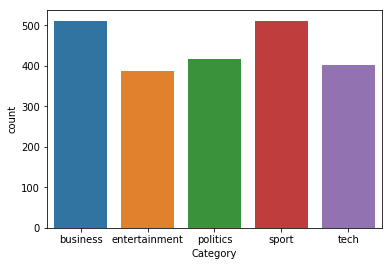

In [9]:
# Using os library for accessing folders
os.chdir(r"C:\Users\Pavan Mannem\projects\Endorsify\BBC News Project\bbc")
News = []
Categories = []

for i in ["business","entertainment","politics","sport","tech"]:
    files = os.listdir(i)
    for txt in files:
        path = i + "/" + txt
        with open(path) as article:
            line = article.readlines()
        data = ' '.join(line)
        News.append(data)
        Categories.append(i)

# A dictionary is created and converted to a data frame to create a corpus for each text file
# Each row of the dataframe is an article 
data = {'Category': Categories, 'News': News}       
df = pd.DataFrame(data)
sns.countplot(x='Category', data=df)
pd.set_option('display.max_colwidth', -1)

In [10]:
df.sample(3,random_state=0)

,Category,News
384,business,"Tate & Lyle boss bags top award\n \n Tate & Lyle's chief executive has been named European Businessman of the Year by a leading business magazine.\n \n Iain Ferguson was awarded the title by US publication Forbes for returning one of the UK's ""venerable"" manufacturers to the country's top 100 companies. The sugar group had been absent from the FTSE 100 for seven years until Mr Ferguson helped it return to growth. Tate's shares have leapt 55% this year, boosted by firming sugar prices and sales of its artificial sweeteners.\n \n ""After years of a sagging stock price and a seven-year hiatus from the FTSE 100, one of Britain's venerable manufacturers has returned to the vaunted index,"" Forbes said. Mr Ferguson took the helm at the company in 2003, after spending most of his career at consumer goods giant Unilever. Tate & Lyle, which was an original member of the historic FT-30 index in 1935, operates more than 41 factories and 20 more additional production facilities in 28 countries. Previous winners of the Forbes award include Royal Bank of Scotland chief executive Fred Goodwin and former Vodafone boss Chris Gent.\n"
1983,tech,"Halo 2 sells five million copies\n \n Microsoft is celebrating bumper sales of its Xbox sci-fi shooter, Halo 2.\n \n The game has sold more than five million copies worldwide since it went on sale in mid-November, the company said. Halo 2 has proved popular online, with gamers notching up a record 28 million hours playing the game on Xbox Live. According to Microsoft, nine out of 10 Xbox Live members have played the game for an average of 91 minutes per session.\n \n The sequel to the best-selling Need for Speed: Underground has inched ahead of the competition to take the top slot in the official UK games charts. The racing game moved up one spot to first place, nudging GTA: San Andreas down to second place. Halo 2 dropped one place to five, while Half-Life 2 fell to number nine. Last week's new releases, GoldenEye: Rogue Agent and Killzone, both failed to make it into the top 10, debuting at number 11 and 12 respectively.\n \n Record numbers of Warcraft fans are settling in the games online world. On the opening day of the World of Warcraft massive multi-player online game more than 200,000 players signed up to play. On the evening of the first day more than 100,000 players were in the world, forcing Blizzard to add another 34 servers to cope with the influx. The online game turns the stand alone Warcraft games into a persistent world that players can inhabit not just visit\n \n Europe's gamers could be waiting until January to hear when they can get their mitts on Nintendo's handheld device, Nintendo DS, says gamesindustry.biz. David Yarnton, Nintendo UK general manager, told a press conference to look out for details in the New Year. Its US launch was on Sunday and it goes on sale in Japan on 2 December. Nintendo has a 95% share of the handheld gaming market and said it expected to sell around five million of the DS by March 2005.\n"
985,politics,"MSPs hear renewed climate warning\n \n Climate change could be completely out of control within several decades, the Scottish Environment Protection Agency is warning a committee of MSPs.\n \n Experts are giving evidence on the subject to the Scottish Parliament's environment committee. Officials believe nuclear energy and wind farms may be better options than trying to tackle global warming. Solutions suggested by conservationists include reducing internal UK air travel and boosting electric trains. The evidence is part of the committee's inquiry into the impact of climate change in Scotland. Sepa is attempting to curb global warming gases, as pollution from transport emissions increases.\n \n Ecologists are warning MSPs that Scotland may have to accept ""significant intrusion"" from wind farms. It is likely also that nuclear power will be needed for possibly several decades. Sepa predict that the two methods will remain as e

# Data Cleaning/preprocessing:

In [11]:
import re
import string

# Removing special characters, new lines, etc. 
def clean(text):
    text = text.lower()
    text = re.sub('\n','',text) 
    text = re.sub('[.*?\â£]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaning = lambda x: clean(x)

# Apply cleaning to data frame 
data_clean = pd.DataFrame(df['News'].apply(cleaning))
data_clean['Category'] = Categories
data_clean = data_clean[['Category','News']]
data_clean.sample(3,random_state=0)

,Category,News
384,business,tate lyle boss bags top award tate lyles chief executive has been named european businessman of the year by a leading business magazine iain ferguson was awarded the title by us publication forbes for returning one of the uks venerable manufacturers to the countrys top companies the sugar group had been absent from the ftse for seven years until mr ferguson helped it return to growth tates shares have leapt this year boosted by firming sugar prices and sales of its artificial sweeteners after years of a sagging stock price and a sevenyear hiatus from the ftse one of britains venerable manufacturers has returned to the vaunted index forbes said mr ferguson took the helm at the company in after spending most of his career at consumer goods giant unilever tate lyle which was an original member of the historic index in operates more than factories and more additional production facilities in countries previous winners of the forbes award include royal bank of scotland chief executive fred goodwin and former vodafone boss chris gent
1983,tech,halo sells five million copies microsoft is celebrating bumper sales of its xbox scifi shooter halo the game has sold more than five million copies worldwide since it went on sale in midnovember the company said halo has proved popular online with gamers notching up a record million hours playing the game on xbox live according to microsoft nine out of xbox live members have played the game for an average of minutes per session the sequel to the bestselling need for speed underground has inched ahead of the competition to take the top slot in the official uk games charts the racing game moved up one spot to first place nudging gta san andreas down to second place halo dropped one place to five while halflife fell to number nine last weeks new releases goldeneye rogue agent and killzone both failed to make it into the top debuting at number and respectively record numbers of warcraft fans are settling in the games online world on the opening day of the world of warcraft massive multiplayer online game more than players signed up to play on the evening of the first day more than players were in the world forcing blizzard to add another servers to cope with the influx the online game turns the stand alone warcraft games into a persistent world that players can inhabit not just visit europes gamers could be waiting until january to hear when they can get their mitts on nintendos handheld device nintendo ds says gamesindustrybiz david yarnton nintendo uk general manager told a press conference to look out for details in the new year its us launch was on sunday and it goes on sale in japan on december nintendo has a share of the handheld gaming market and said it expected to sell around five million of the ds by march
985,politics,msps hear renewed climate warning climate change could be completely out of control within several decades the scottish environment protection agency is warning a committee of msps experts are giving evidence on the subject to the scottish parliaments environment committee officials believe nuclear energy and wind farms may be better options than trying to tackle global warming solutions suggested by conservationists include reducing internal uk air travel and boosting electric trains the evidence is part of the committees inquiry into the impact of climate change in scotland sepa is attempting to curb global warming gases as pollution from transport emissions increases ecologists are warning msps that scotland may have to accept significant intrusion from wind farms it is likely also that nuclear power will be needed for possibly several decades sepa predict that the two methods will remain as energy sources until climate change is under control experts studying the seas off scotlands west coast have already forecast more devastating weather of the type which caused havoc across the country last month they predicted that damaging storms will be

# Text Tokenization 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Stop words are not removed becuase countries like 'US' will be removed from the dataset
# Split into unigrams and bigrams 
cv = CountVectorizer(ngram_range = (1,2), stop_words=None)
data_cv = cv.fit_transform(data_clean['News'])

# Create a document term matrix
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())


countries = ['us','united states','uk','united kingdom','argentina',
             'australia','brazil','canada','china','france','germany',
            'india','indonesia','italy','japan','mexico','south korea',
             'russia','saudi arabia','south africa','turkey','eu']

g20 = data_dtm.filter(countries)
g20.sample(3,random_state=0)

,us,united states,uk,united kingdom,argentina,australia,brazil,canada,china,france,...,indonesia,italy,japan,mexico,south korea,russia,saudi arabia,south africa,turkey,eu
384,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983,1,0,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
985,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Remove every row that has 0 for every column
# This removes articles that are not about G20 countries 
g20 = g20[~(g20==0).all(1)]

# The amount of rows after removal is the number of G20 articles
g20.shape

(1420, 22)

## Total number of G20 articles = 1420

In [14]:
# Combine multiple spellings of 'US' and 'UK' and add them back to the dataframe 
us_total = g20['us'] + g20['united states']
uk_total = g20['uk'] + g20['united kingdom']
g20['usa'] = us_total
g20['United kingdom'] = uk_total
g20 = g20.drop(['us','united states','uk','united kingdom'],axis=1)
g20.rename(columns={'United kingdom':'uk'}, inplace=True)
g20.head()

,argentina,australia,brazil,canada,china,france,germany,india,indonesia,italy,japan,mexico,south korea,russia,saudi arabia,south africa,turkey,eu,usa,uk
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


## Number of G20 articles per country 

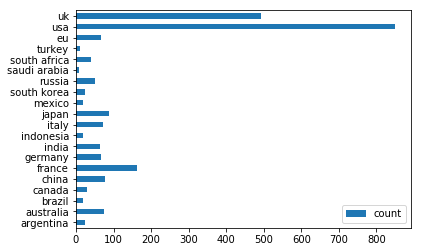

In [15]:
# Count the rows in each column that are not 0
# Gives the number of articles per country
articles_per_country = g20.astype(bool).sum(axis=0)
articles_per_country.name = 'count'
apc_df = articles_per_country.to_frame()
apc_df.plot.barh()


## Find the overlap of countries

In [16]:
cols = g20.columns

# Remove empty rows
# Create a list for each article that contains the countries included
overlap = g20.apply(lambda x: ~(x == 0))
overlap = overlap.apply(lambda x: np.array(cols[x.values]), axis=1)

# Drop single country articles 
for i in overlap.index:
    if (len(overlap[i]) < 2):
        overlap = overlap.drop(i)

overlap.head()

1     [china, usa]                                         
2     [russia, usa]                                        
4     [usa, uk]                                            
7     [brazil, china, india, russia, south africa, usa, uk]
11    [indonesia, usa]                                     
dtype: object

## Using tf-idf to find important words by section of articles

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import text

transformer = TfidfTransformer()

# Include custom list of stop words for TFIDF and LDA analysis 
stop_custom = text.ENGLISH_STOP_WORDS.union(['new','said','mr','year', 'told','bbc'])
cv_unigram = CountVectorizer(ngram_range = (1,1), stop_words = stop_custom)
cv_bigram = CountVectorizer(ngram_range = (2,2), stop_words = stop_custom)

def unigram_themes(text):
    data_cv_stop = cv_unigram.fit_transform(text)
    transformed_weights = transformer.fit_transform(data_cv_stop)
    weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
    weights_df = pd.DataFrame({'term': cv_unigram.get_feature_names(), 'weight': weights})
    return weights_df.sort_values(by='weight', ascending=False).head(6)
    
def bigram_themes(text):
    data_cv_stop = cv_bigram.fit_transform(text)
    transformed_weights = transformer.fit_transform(data_cv_stop)
    weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
    weights_df = pd.DataFrame({'term': cv_bigram.get_feature_names(), 'weight': weights})
    return weights_df.sort_values(by='weight', ascending=False).head(6)
    

for i in ["business","entertainment","politics","sport","tech"]:
    print(i +' ---------------------')
    print('unigrams: ')
    unigram_themes(data_clean['News'][data_clean['Category'] == i])
    print('bigrams: ')
    bigram_themes(data_clean['News'][data_clean['Category'] == i])

   

business ---------------------
unigrams: 


,term,weight
4538,growth,0.022846
3279,economy,0.021755
9004,sales,0.021391
890,bank,0.019562
6268,market,0.019376
7082,oil,0.019229


bigrams: 


,term,weight
9910,chief executive,0.007586
19256,economic growth,0.005721
17150,deutsche boerse,0.005627
59827,stock market,0.005439
43042,oil prices,0.005203
59820,stock exchange,0.004085


entertainment ---------------------
unigrams: 


,term,weight
3977,film,0.045449
1000,best,0.037138
6907,music,0.023723
7177,number,0.021188
729,awards,0.020603
11638,years,0.019234


bigrams: 


,term,weight
5816,box office,0.010036
28979,million dollar,0.005846
13636,dollar baby,0.005531
17266,film festival,0.005447
27199,los angeles,0.005429
4804,best film,0.005408


politics ---------------------
unigrams: 


,term,weight
5583,labour,0.032965
3193,election,0.032752
1036,blair,0.032200
7099,party,0.027127
1257,brown,0.026566
4283,government,0.026537


bigrams: 


,term,weight
47151,prime minister,0.013791
24797,general election,0.010032
62046,tony blair,0.009305
34823,lib dems,0.008508
28683,human rights,0.008369
38133,michael howard,0.007853


sport ---------------------
unigrams: 


,term,weight
3025,england,0.024411
3809,game,0.022436
10642,world,0.020797
10565,win,0.020384
10371,wales,0.018820
2186,cup,0.017777


bigrams: 


,term,weight
3055,australian open,0.006481
8002,champions league,0.006463
62788,world cup,0.006312
23177,grand slam,0.006136
12683,davis cup,0.005343
62835,world number,0.004595


tech ---------------------
unigrams: 


,term,weight
7786,people,0.033242
6819,mobile,0.028743
4427,games,0.024900
6996,music,0.023693
9966,software,0.022660
10769,technology,0.021742


bigrams: 


,term,weight
37837,mobile phone,0.006904
37838,mobile phones,0.005608
40063,news website,0.005198
15736,digital music,0.004845
35015,mac mini,0.004779
11735,consumer electronics,0.004038


## Using LDA (Latent Dirichlet Allocation) for topic modeling by section of articles

In [18]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
n_topics = 1
n_words = 6

# Tokenize unigrams and bigrams
cv = CountVectorizer(ngram_range = (1,2), stop_words = stop_custom)

def print_LDA_topics(model, count_vectorizer, n_top_words):
    words = cv.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

        
for i in ["business","entertainment","politics","sport","tech"]:
    data_cv = cv.fit_transform(data_clean['News'][data_clean['Category'] == i])
    lda = LDA(n_components=n_topics, n_jobs=-1)
    lda.fit(data_cv)
    print_LDA_topics(lda, cv, n_words)


C:\Users\Pavan Mannem\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=1, n_jobs=-1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)


Topic #0:
market growth company economy firm bank


C:\Users\Pavan Mannem\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=1, n_jobs=-1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)


Topic #0:
film best years music series woman


C:\Users\Pavan Mannem\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=1, n_jobs=-1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)


Topic #0:
labour election people government party blair


C:\Users\Pavan Mannem\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=1, n_jobs=-1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)


Topic #0:
game win england world time players


C:\Users\Pavan Mannem\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=1, n_jobs=-1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)


Topic #0:
people games mobile technology online users


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', ngram_range=(1, 2), stop_words='english')
X = tfidf.fit_transform(data_clean.News)
Y = data_clean.Category

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
model = RandomForestClassifier(n_estimators=300, max_depth=150,n_jobs=1)
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=150, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Model: Random Forest Classifier 
Accuracy -  0.9595505617977528


Text(33,0.5,'Actual')

Text(0.5,15,'Predicted')

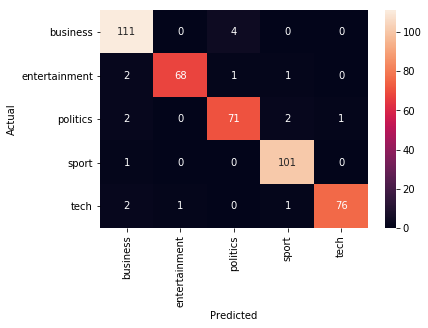

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Model: Random Forest Classifier ")
print("Accuracy - ", acc)
c_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(c_mat, annot=True, fmt='d', xticklabels=["business","entertainment","politics","sport","tech"], yticklabels=["business","entertainment","politics","sport","tech"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
